# Principal Component Analysis

Principal Component Analysis (PCA) is an eigenvector based implementation of an algorithm that allows to reduce complexity of the dataset.

Whereas it is posible to draw 1D, 2D, 3D dataset it is practically impossible to represent a dataset with, for example - 50 features.

PCA allows to find the factors that are the most important and then reduce its number so it is possible to visualize the data, or run the ML algorithms much faster.

## Global imports

In [1]:
import numpy as np
from load_mat import load_mat
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

## Loading dataset

Matlab file ***'ex7faces.mat'*** located inside **data** directory contains matrix of size 5000x1024. It contains 5000 images of faces, each 32 px x 32 px.

Our goal is to reduce the complexity of each image so the result will be compressed images which we will be able to uncompress later on.

In [2]:
from load_mat import load_mat

x = load_mat('./data/ex7faces.mat', 'X')

## Visualize dataset

The code for visualising the dataset is not related to ML, therefore will be ommited - it can be found in ***plot_images.py*** file.

D:\Programming\machine-learning-jupyter\principal_component_analysis\plot_images.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


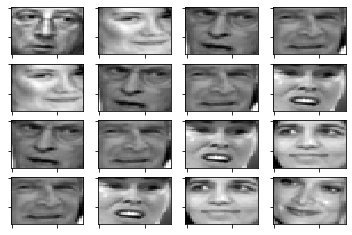

In [3]:
from plot_images import get_random_img
from plot_images import plot_images

images = [get_random_img(x) for i in range(0, 16)]
plot_images(images)

## Feature normalise

Before running the PCA we need to normalise all the features to make sure that these will be treated 'equally'.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(x)
x_norm = scaler.transform(x)

## PCA

The code for PCA is located in a separate python file. It calculates the converiance and then uses the numpy SVD function to calculate the eigenvector and eigenvalues.

In [10]:
def pca(x):
    (m, n) = np.shape(x)
    conv = (x.T @ x) / m
    u, s, v = svd(conv)
    return u, s

In [11]:
from pca import pca

u, s = pca(x_norm)

## Project data

The next step covers applying the eigenvalue to the dataset so we minimize the number of features.

This step actually compress the images.

In [12]:
def project_data(x, u, k):
    z = np.zeros((np.size(x, 0), k))
    for i in range(0, np.size(x, 0)):
        col = x[i, :].T
        for j in range(0, k):
            projection_k = col.T @ u[:, j]
            z[i, j] = projection_k
    return z

In [17]:
from project_data import project_data

k = 100
z = project_data(x_norm, u, k)

## Visualize compressed images

In this section we use projected (compressed) dataset z and visualize the dataset.

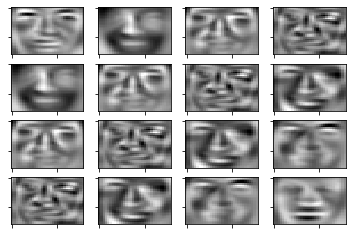

In [18]:
from plot_images import get_random_img
from plot_images import plot_images

images = [get_random_img(u[:, :k].T) for i in range(0, 16)]
plot_images(images)

## Recover dataset

After compressing the data, we can uncompress the images using the eigenvalue.

The code will take three parameters:

* z - the projected data (dataset x with reduced dimensions)

* u - the calculated eigenvectors

* k - number of features the dataset was reduced to

It will then go through every single value and calculate the (approximate) recovered value.

In [19]:
def recover_data(z, u, k):
    z_size = np.size(z, 0)
    u_size = np.size(u, 1)
    x_recovered = np.zeros((z_size, u_size))
    for i in range(0, z_size):
        for j in range(0, u_size):
            v = z[i, :].T
            j_recovered = v.T @ u[j, 1:k].T
            x_recovered[i, j] = j_recovered
    return x_recovered

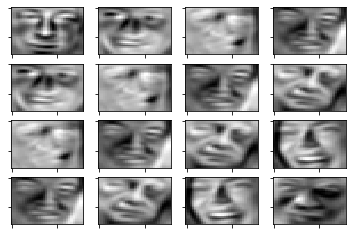

In [20]:
from recover_data import recover_data

x_recovered = recover_data(z, u, k)
images = [get_random_img(x_recovered) for i in range(0, 16)]
plot_images(images)

# Using SkLearn library

The very same code can be replaced with just a few lines of code by using PCA implementation provided by a SkLearn library.

## Compressing images

D:\Programming\machine-learning-jupyter\principal_component_analysis\plot_images.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


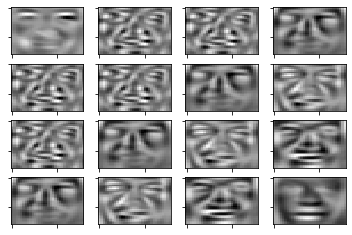

In [22]:
from sklearn.decomposition import PCA

pca_engine = PCA(n_components=k)
x_reduce = pca_engine.fit_transform(x_norm)
images = [get_random_img(pca_engine.components_) for i in range(0, 16)]
plot_images(images)

## Decompressing images

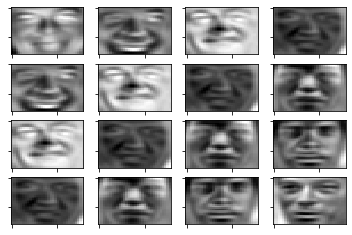

In [25]:
from sklearn.decomposition import PCA

x_appx = pca_engine.inverse_transform(x_reduce)
images = [get_random_img(x_appx) for i in range(0, 16)]
plot_images(images)